# Capstone Analytic Report and Research Proposal

In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

## 1. Describe and explore a dataset. 
### What does your data contain, and what is its background? Where does it come from? Why is it interesting or significant?

I will be exploring mass shootings that have taken place in the United States in the last 50 years (1966-2017). The dataset contains detailed information of 398 mass shootings in the United States of America that killed 1996 and injured 2488 people, and was originally sourced from public datasets and web pages (e.g. Wikipedia, Mother Jones, Stanford, USA Today, etc.).

The data contains attributes that track information like date, location, victim and police fatalities, the shooter's details (age, race, gender), and cause. A full list of the attributes, as well as previous versions of this dataset can be found on the dataset's [Kaggle page](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years/data).

I found this dataset interesting, because many people have bemoaned the advent of "Big Data" for potentially letting data scientists wield math and statistics incorrectly to reinforce preexisting biases in our society. In the hands of an ill-steered or misinformed data scientist, for example, financial data may recommend against loans for historically lower-income demographic groups, or recommend a higher insurance premium for applicants who live in a particular county. It is up to the humans, the data science practitioners, to intervene and assess the conclusions the data is surfacing to determine which of them are logically sound. 

A dataset that combines race and crime data in particular, especially on a social issue as emotionally charged as mass shootings / gun rights, seems ripe for misinterpreting and stereotype-reinforcing if analyzed incorrectly. I wanted to work with this data because I wanted practice making sound conclusions about complex data. I first became interested in data science, because I wanted to be literate in this new "language" to  counter the many incorrect conclusions that will inevitably be derived via inappropriate statistical practices – especially in this increasingly data-driven world.

### Conduct summary statistics and produce visualizations for the variables you use.

First, I want to take a look at my raw data and see some summary statistics about its columns.

In [462]:
df = pd.read_csv('mass_shootings_v_5.csv', encoding = "ISO-8859-1")
df

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN
5,6,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,Weis grocery,Close,coworkers,terrorism,"Randy Stair, a 24-year-old worker at Weis groc...",3,...,3,NaN,24,1.0,Weis grocery,Unclear,White,M,NaN,NaN
6,7,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,manufacturer Fiamma Inc.,Close,coworkers,unemployement,"John Robert Neumann, Jr., 45, a former employe...",5,...,5,NaN,45,1.0,manufacturer Fiamma Inc.,Unclear,NaN,M,NaN,NaN
7,8,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,a nursing home,Close,coworkers,NaN,"Thomas Hartless, 43, shot and killed a former ...",3,...,3,1.0,43,1.0,some nursing home,Yes,White,M,NaN,NaN
8,9,Fresno downtown shooting,"Fresno, California",4/18/2017,a street in downtown,Open,random,racism,"Kori Ali Muhammad, 39, opened fire along a str...",3,...,3,NaN,39,NaN,NaN,Unclear,Black,M,NaN,NaN
9,10,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,baggage claim area of the airport,Close,random,terrorism,"Esteban Santiago, 26, flew from Alaska to Fort...",5,...,11,NaN,26,NaN,NaN,Yes,Latino,M,NaN,NaN


In [463]:
print(df.columns)
df.describe()

Index(['S#', 'Title', 'Location', 'Date', 'Incident Area',
       'Open/Close Location', 'Target', 'Cause', 'Summary', 'Fatalities',
       'Injured', 'Total victims', 'Policeman Killed', 'Age',
       'Employeed (Y/N)', 'Employed at', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'],
      dtype='object')


,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


I am going to focus on 4 main attributes about the shooter – his/her age, race, employment status, and gender – for my preliminary exploration of the data.

First, I want to explore the age breakdown of shooters. I can see from the data that I will need to account for `NaN` values, as well as rows in which there are 2 comma-separated values (for 2-person shootings).

In [464]:
print(df['Age'].unique())

['26' '47' '37' '64' '38' '24' '45' '43' '39' '20' nan '25' '29' '0' '42'
 '57' '21' '27' '22' '19' '34' '44' '23' '12' '40' '59' '33' '70' '15' '36'
 '19,32' '17' '41' '32' '19,22' '28' '52' '18' '14' '16' '48' '66' '13'
 '17,18' '13,11' '35' '55' '50' '31' '30' '15,16' '51']


I will remove all `NaN` values, parse the `Age` column so I can get all shooters' ages (even those involved in 2-person shootings), and then plot all `Age` values to get a sense of that data.

Mean:  31.3641304348
Median:  30.0


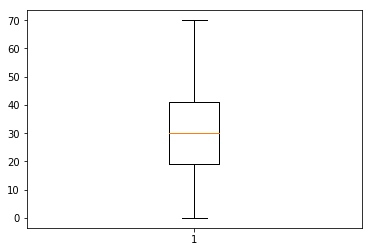

In [465]:
ages_without_nans = df[pd.notnull(df['Age'])]

def get_age(age):
    return ['nan' if each_age == 'nan' else int(each_age) for each_age in str(age).split(',')]

age_col = ages_without_nans['Age'].apply(get_age)
all_non_null_ages = np.concatenate(age_col.values.tolist())

print('Mean: ', all_non_null_ages.mean())
print('Median: ', np.median(all_non_null_ages))

plt.boxplot(all_non_null_ages)
plt.show()

Next, I want to see the race breakdown of shooters. I can see from the data that the `Race` column needs to be cleaned to have consistent labeling ('White', 'Black', 'Asian', 'Latino', 'Native American', 'Biracial', 'Other', 'Unknown').

In [466]:
df.groupby('Race').count()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Gender,Latitude,Longitude
Race,,,,,,,,,,,,,,,,,,,,
Asian,6,6,6,6,5,6,6,4,6,6,6,6,6,6,2,1,6,6,5,5
Asian American,11,11,10,11,11,11,11,8,11,11,11,11,11,6,3,3,11,11,11,11
Asian American/Some other race,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
Black,5,5,5,5,4,5,5,3,5,5,5,5,4,3,1,4,5,5,0,0
Black American or African American,76,76,66,76,59,68,75,57,76,76,76,76,75,31,12,8,76,76,76,76
Black American or African American/Unknown,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
Latino,5,5,5,5,4,4,5,4,5,5,5,5,4,5,1,1,5,5,2,2
Native American or Alaska Native,3,3,3,3,2,2,3,3,3,3,3,3,3,2,0,0,3,3,3,3
Other,2,2,2,2,2,2,2,1,2,2,2,2,2,1,0,0,2,2,0,0


In [467]:
races_without_nans = df[pd.notnull(df['Race'])]

race_dict = {
    'Asian American': 'Asian',
    'Asian American/Some other race': 'Asian',
    'Black American or African American': 'Black',
    'Black American or African American/Unknown': 'Black',
    'Native American or Alaska Native': 'Native American',
    'Some other race': 'Other',
    'Two or more races': 'Biracial',
    'White American or European American': 'White',
    'White American or European American/Some other Race': 'White',
    'black': 'Black',
    'white': 'White'
}
races_without_nans = races_without_nans.replace({'Race': race_dict})
unique_races = races_without_nans['Race'].unique()
race_breakdown = races_without_nans.groupby('Race').count()

print('Unique Races: ', unique_races)
race_breakdown

Unique Races:  ['White' 'Black' 'Asian' 'Latino' 'Other' 'Unknown' 'Biracial'
 'Native American']


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Gender,Latitude,Longitude
Race,,,,,,,,,,,,,,,,,,,,
Asian,18,18,17,18,17,18,18,13,18,18,18,18,18,12,5,4,18,18,17,17
Biracial,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2
Black,85,85,75,85,66,76,83,64,85,85,85,85,83,37,14,12,85,85,80,80
Latino,5,5,5,5,4,4,5,4,5,5,5,5,4,5,1,1,5,5,2,2
Native American,3,3,3,3,2,2,3,3,3,3,3,3,3,2,0,0,3,3,3,3
Other,22,22,20,22,20,21,22,15,22,22,22,22,22,12,5,2,22,22,20,20
Unknown,42,42,18,42,30,36,40,24,42,42,42,42,42,6,3,2,42,42,42,42
White,144,144,136,144,118,134,143,119,144,144,144,144,143,103,38,19,144,144,137,137


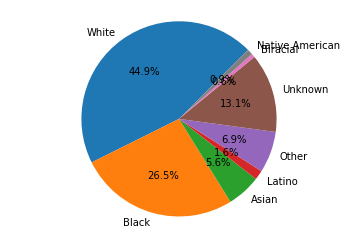

In [468]:
race_sizes = [race_breakdown['S#'][x] for x in unique_races]
race_explode = (0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(race_sizes, explode=race_explode, labels=unique_races, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

Next, I want to see the employment breakdown of shooters.

In [469]:
df.groupby('Employeed (Y/N)').count()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
Employeed (Y/N),,,,,,,,,,,,,,,,,,,,
0.0,25,25,25,25,21,24,25,25,25,25,25,25,25,25,0,25,25,25,25,25
1.0,42,42,41,42,35,41,41,29,42,42,42,42,40,32,37,42,41,42,35,35


Lastly, I want to see the gender breakdown of shooters. I can see from the data that the `Gender` column needs to be cleaned to have consistent labeling ('M', 'F', 'M/F', and 'Unknown').

In [470]:
df.groupby('Gender').count()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Latitude,Longitude
Gender,,,,,,,,,,,,,,,,,,,,
Female,5,5,5,5,3,4,5,5,5,5,5,5,5,5,2,2,5,5,5,5
M,20,20,20,20,17,19,20,12,20,20,20,20,15,17,7,9,20,18,1,1
M/F,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0
Male,272,272,246,272,222,247,268,217,272,272,272,272,271,155,56,29,272,272,272,272
Male/Female,4,4,4,4,4,4,4,4,4,4,4,4,4,1,2,1,4,4,4,4
Unknown,21,21,2,21,14,20,20,7,21,21,21,21,21,1,0,0,21,21,21,21


In [471]:
gender_dict = {
    'Female': 'F',
    'Male': 'M',
    'Male/Female': 'M/F'
}
df = df.replace({"Gender": gender_dict})
unique_genders = df['Gender'].unique()
gender_breakdown = df.groupby('Gender').count()

print('Unique Genders: ', unique_genders)
gender_breakdown

Unique Genders:  ['M' 'Unknown' 'M/F' 'F']


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Latitude,Longitude
Gender,,,,,,,,,,,,,,,,,,,,
F,5,5,5,5,3,4,5,5,5,5,5,5,5,5,2,2,5,5,5,5
M,292,292,266,292,239,266,288,229,292,292,292,292,286,172,63,38,292,290,273,273
M/F,5,5,5,5,5,5,5,5,5,5,5,5,5,1,2,1,5,5,4,4
Unknown,21,21,2,21,14,20,20,7,21,21,21,21,21,1,0,0,21,21,21,21


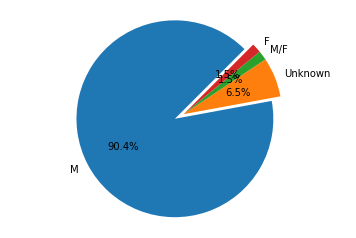

In [472]:
sizes = [gender_breakdown['S#'][x] for x in unique_genders]
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=unique_genders, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

## 2. Ask and answer 3 analytic questions with a combination of statistics and visualizations.

### a) Which age range is the deadliest (i.e. has been responsible for the most fatalities per shooter)?

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


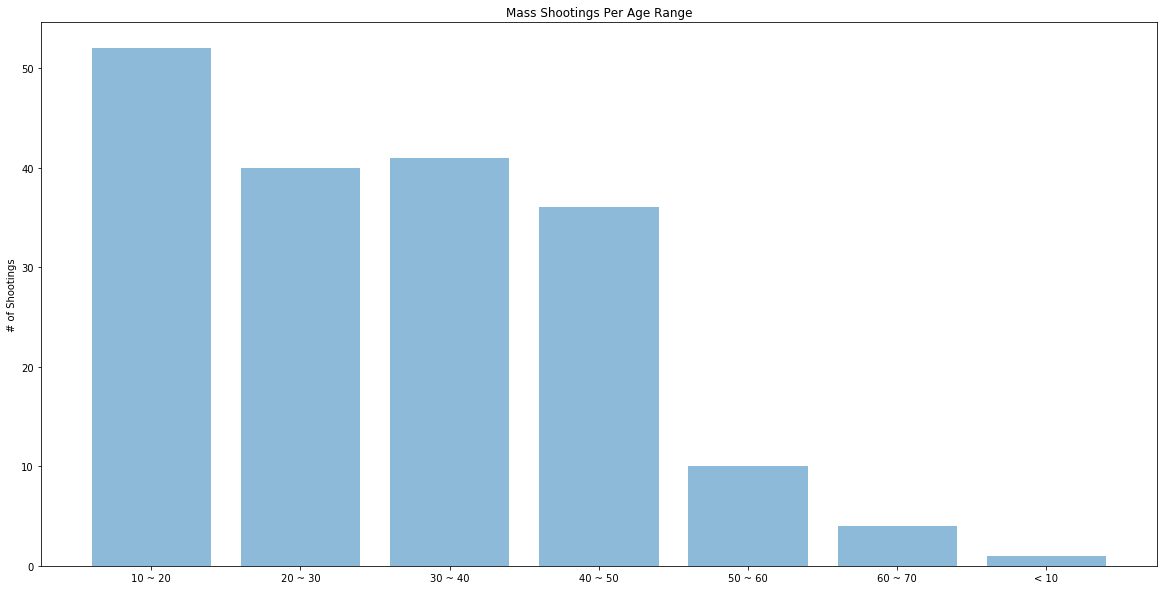

In [473]:
def get_age_range(age):
    if len(age.split(',')) > 1:
        return [get_range(each_age) for each_age in age.split(',')]
    elif int(age) < 10:
        return ['< 10']
    elif int(age) <= 20:
        return ['10 ~ 20']
    elif int(age) <= 30:
        return ['20 ~ 30']
    elif int(age) <= 40:
        return ['30 ~ 40']
    elif int(age) <= 50:
        return ['40 ~ 50']
    elif int(age) <= 60:
        return ['50 ~ 60']
    elif int(age) <= 70:
        return ['60 ~ 70']

def get_fatalities_per_shooter(age_and_fatalities):
    age = age_and_fatalities[0]
    fatalities = age_and_fatalities[1]
    if len(age.split(',')) > 1:
        return [fatalities / 2, fatalities / 2]
    else: 
        return [fatalities]
    
ages_without_nans['Age Range'] = [get_age_range(age) for age in ages_without_nans['Age']]
all_age_ranges = np.concatenate(ages_without_nans['Age Range'].values.tolist())

unique_ranges, counts = np.unique(all_age_ranges, return_counts=True)
y_pos = np.arange(len(unique_ranges))

plt.figure(figsize=(20,10))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, unique_ranges)
plt.ylabel('# of Shootings')
plt.title('Mass Shootings Per Age Range')
 
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


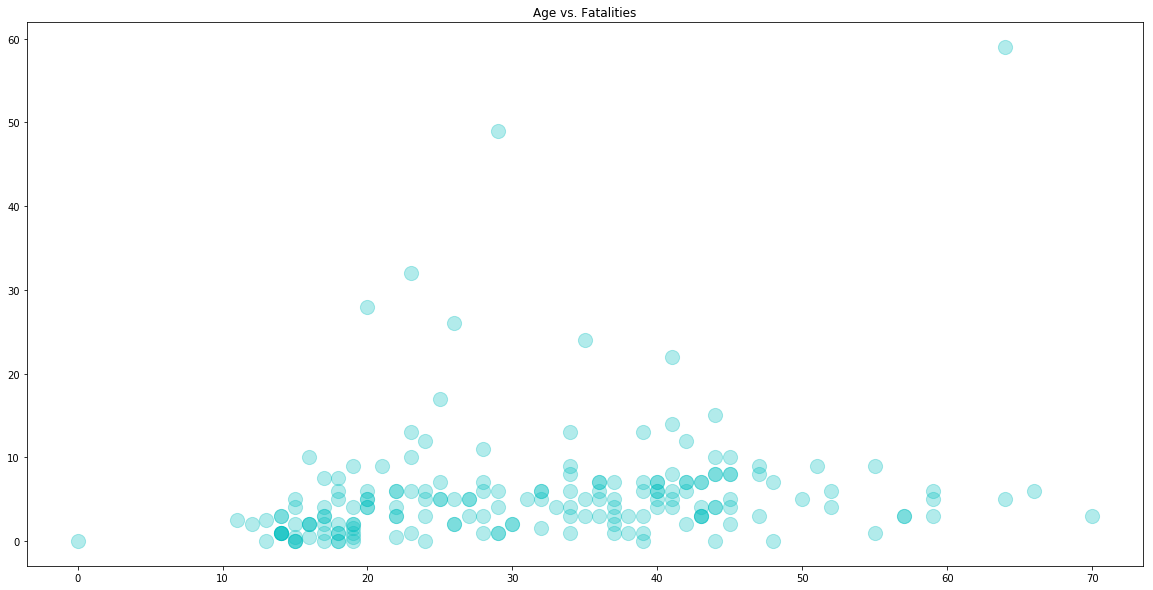

In [474]:
ages_and_fatalities = zip(ages_without_nans['Age'], ages_without_nans['Fatalities'])
ages_without_nans['Fatalities per Shooter'] = [get_fatalities_per_shooter(pair) for pair in ages_and_fatalities]
all_fatalities_per_shooter = np.concatenate(ages_without_nans['Fatalities per Shooter'].values.tolist())

plt.figure(figsize=(20,10))
plt.title('Age vs. Fatalities')
plt.scatter(all_non_null_ages, all_fatalities_per_shooter, alpha = 0.3, color = 'c', s=200)
plt.show()

# plt.figure(figsize=(20,10))
# plt.title('Fatalities per Age Range')
# plt.ylabel('# of Fatalities')
# plt.scatter(all_age_ranges, all_fatalities_per_shooter, alpha = 0.3, color = 'c', s=500)
# plt.show()

It is clear from the chart that shooters aged 10 - 20 are the most prolific group of shooters, but that those aged 20 - 30 are on average the deadliest and kill the most people per incident (apart from one high outlier in the 60 - 70 range).

### b) What are the leading causes of mass shootings perpetrated by mentally ill shooters? How about those perpetrated by those who are not mentally ill?

I can see from the data that the `Mental Health Issues` and `Cause` columns need to be cleaned to have consistent labeling.

In [475]:
df['Mental Health Issues'].unique()
df['Cause'].unique()

array(['unknown', nan, 'terrorism', 'unemployement', 'racism',
       'frustration', 'domestic dispute', 'anger', 'psycho', 'revenge',
       'domestic disputer', 'suspension', 'religious radicalism', 'drunk',
       'failing exams', 'breakup', 'robbery'], dtype=object)

I will normalize the `Mental Health Issues` column so that each field is either 'Yes', 'No', or 'Unknown'. I will group the various causes in the `Cause` column to fall within 7 main categories: 'unknown', 'extremism', 'incident of failure', 'personal', 'mental', 'physical', and 'money'.

In [476]:
mental_dict = {
    'Unclear': 'Unknown',
    'unknown': 'Unknown'
}

cause_dict = {
    'unknown': 'Unknown',
    
    'unemployement': 'Incident of Failure',
    'failing exams': 'Incident of Failure',
    'suspension': 'Incident of Failure',
    'breakup': 'Incident of Failure',
    
    'terrorism': 'Extremist Ideology',
    'religious radicalism': 'Extremist Ideology',
    'racism': 'Extremist Ideology',
    
    'domestic dispute': 'Personal Issues',
    'domestic disputer': 'Personal Issues',
    'revenge': 'Personal Issues',
    'anger': 'Personal Issues',
    'frustration': 'Personal Issues',
    
    'drunk': 'Physical Incapacitation',
    
    'psycho': 'Mental Incapacitation',
    
    'robbery': 'Money'
}

df = df.replace({"Mental Health Issues": mental_dict})
df = df.replace({"Cause": cause_dict})
print(df['Cause'].unique())

unique_mentals = df['Mental Health Issues'].unique()
df = df.replace({"Mental Health Issues": mental_dict})
mental_breakdown = df.groupby('Mental Health Issues').count()

print('Unique Mental Health Issues: ', unique_mentals)

['Unknown' nan 'Extremist Ideology' 'Incident of Failure' 'Personal Issues'
 'Mental Incapacitation' 'Physical Incapacitation' 'Money']
Unique Mental Health Issues:  ['No' 'Unknown' 'Yes']


In [481]:
no_null_mental = df[pd.notnull(df['Mental Health Issues'])]
no_null_cause = no_null_mental[pd.notnull(df['Cause'])]

no_null_mentals_or_causes = no_null_cause[['Mental Health Issues', 'Cause']]
mentally_ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'Yes']

ill_unique_causes = mentally_ill['Cause'].unique()
ill_mental_cause_breakdown = mentally_ill.groupby('Cause').count()
print(ill_mental_cause_breakdown)

                       Mental Health Issues
Cause                                      
Extremist Ideology                       30
Incident of Failure                       7
Mental Incapacitation                    31
Personal Issues                          23


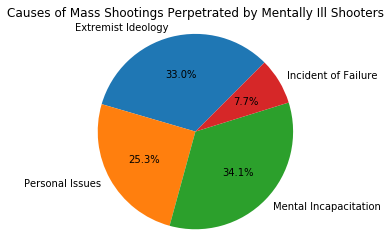

In [482]:
ill_cause_sizes = [ill_mental_cause_breakdown['Mental Health Issues'][cause] for cause in ill_unique_causes]
ill_cause_explode = (0, 0, 0, 0)

plt.title('Causes of Mass Shootings Perpetrated by Mentally Ill Shooters')
plt.pie(ill_cause_sizes, explode=ill_cause_explode, labels=ill_unique_causes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

In [480]:
not_mentally_ill = no_null_mentals_or_causes[no_null_mentals_or_causes['Mental Health Issues'] == 'No']

not_ill_unique_causes = not_mentally_ill['Cause'].unique()
not_ill_mental_cause_breakdown = not_mentally_ill.groupby('Cause').count()
print(not_ill_mental_cause_breakdown)

                         Mental Health Issues
Cause                                        
Extremist Ideology                         17
Incident of Failure                         7
Mental Incapacitation                      20
Money                                       1
Personal Issues                            27
Physical Incapacitation                     1
Unknown                                     3


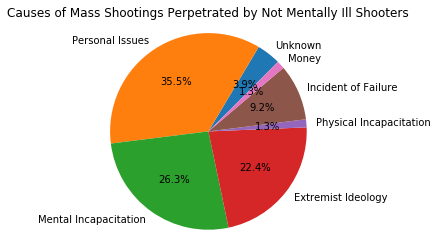

In [479]:
not_ill_cause_sizes = [not_ill_mental_cause_breakdown['Mental Health Issues'][cause] for cause in not_ill_unique_causes]
not_ill_cause_explode = (0, 0, 0, 0, 0, 0, 0)

plt.title('Causes of Mass Shootings Perpetrated by Not Mentally Ill Shooters')
plt.pie(not_ill_cause_sizes, explode=not_ill_cause_explode, labels=not_ill_unique_causes, autopct='%1.1f%%', startangle=45)
plt.axis('equal')
plt.show()

### c) Why do shooters (by gender, by race) commit mass shootings?

## 3. Make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. It should present one or more clear questions, then describe the techniques needed to arrive at an answer.

a) I'd like to be able to create a heat map using the latitude and longitude of each shooting's location to answer the question "Where do mass shootings most often occur?"

To do this, I would have to learn how to find an accepted map tile or mapping library to accomplish this – perhaps from an API somewhere– or learn how to use a custom image and configure accordingly. I would also have to learn how to position data points appropriately on that image given its scale and each data point's latitude and longitude (i.e. x and y coordinates).

b) I'd also like to be able to display a series of Venn Diagrams that answer the question "For each category of mass shooting cause, what proportion of them were committed by [insert race here] / [insert mental health issue here] people?"

To do this, I would have to learn what `matplotlib` method to use (or find a different library that would allow me to do this). I would also have to learn how to format the data to be in a format that is 